# Save Heart

In [54]:
# loading dataset
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data splitting
from sklearn.model_selection import train_test_split
# search for best hyperparameters
from sklearn.model_selection import GridSearchCV
# classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# accuracy metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, auc, RocCurveDisplay
# model persistence
from joblib import dump

In [55]:
data = pd.read_csv('../Dataset/heart-saver.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,thal,target
0,63,1,3,145,233,1,150,0,1,1
1,37,1,2,130,250,0,187,0,2,1
2,41,0,1,130,204,0,172,0,2,1
3,56,1,1,120,236,0,178,0,2,1
4,57,0,0,120,354,0,163,1,2,1


In [56]:
data["sex"].value_counts()

1    207
0     94
Name: sex, dtype: int64

In [57]:
data["cp"].value_counts()

0    143
2     85
1     50
3     23
Name: cp, dtype: int64

In [58]:
data["fbs"].value_counts()

0    256
1     45
Name: fbs, dtype: int64

In [59]:
data["exang"].value_counts()

0    202
1     99
Name: exang, dtype: int64

In [60]:
data["thal"].value_counts()

2    165
3    117
1     19
Name: thal, dtype: int64

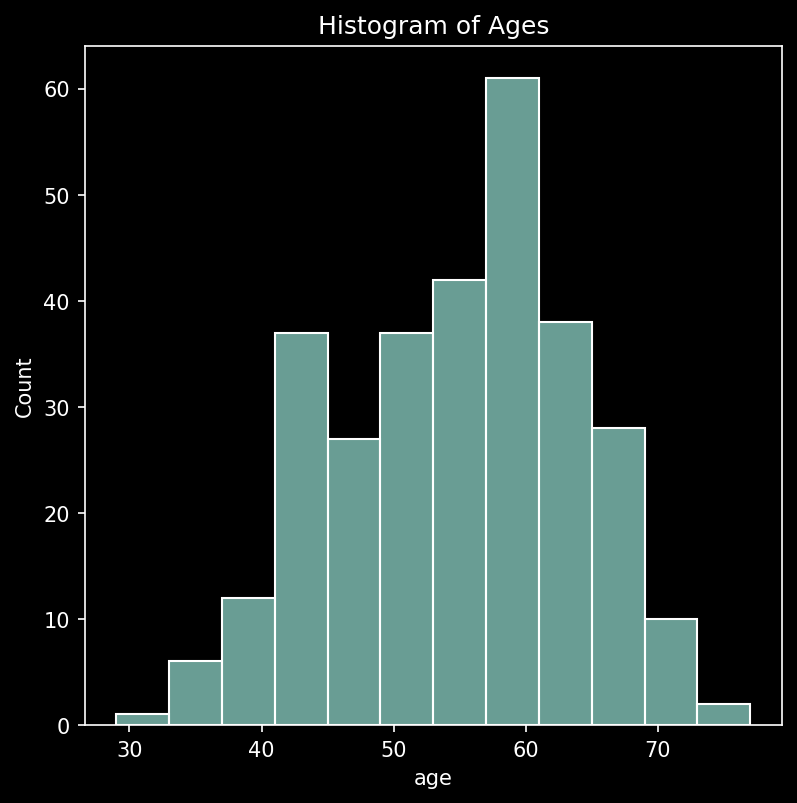

In [61]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Histogram of Ages")
sns.histplot(data["age"])
plt.savefig("../media/age_histogram.png", bbox_inches='tight')

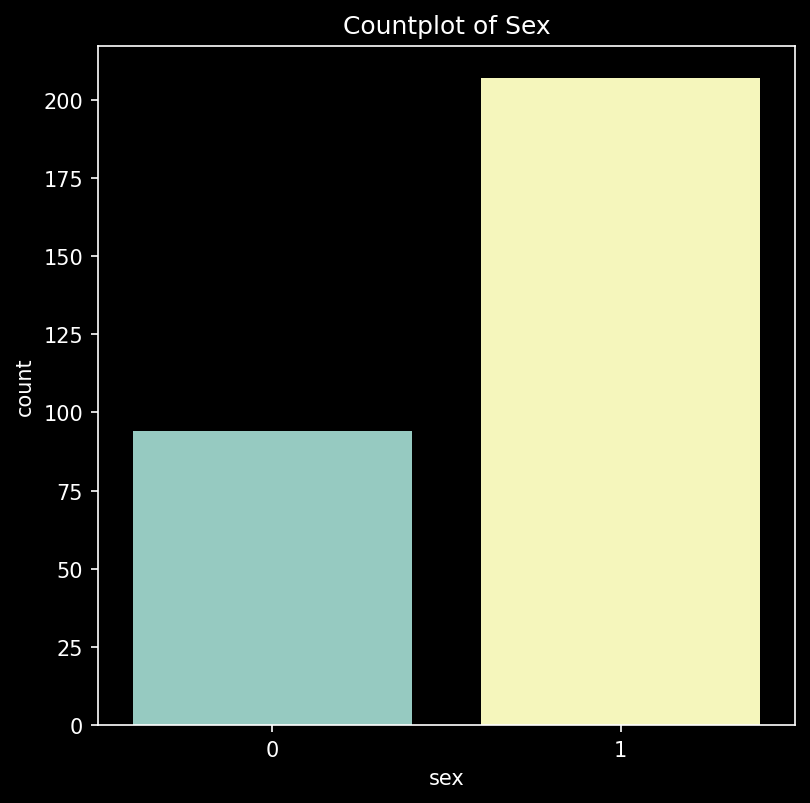

In [62]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Countplot of Sex")
sns.countplot(x='sex', data=data)
plt.savefig("../media/sex_countplot.png", bbox_inches='tight')

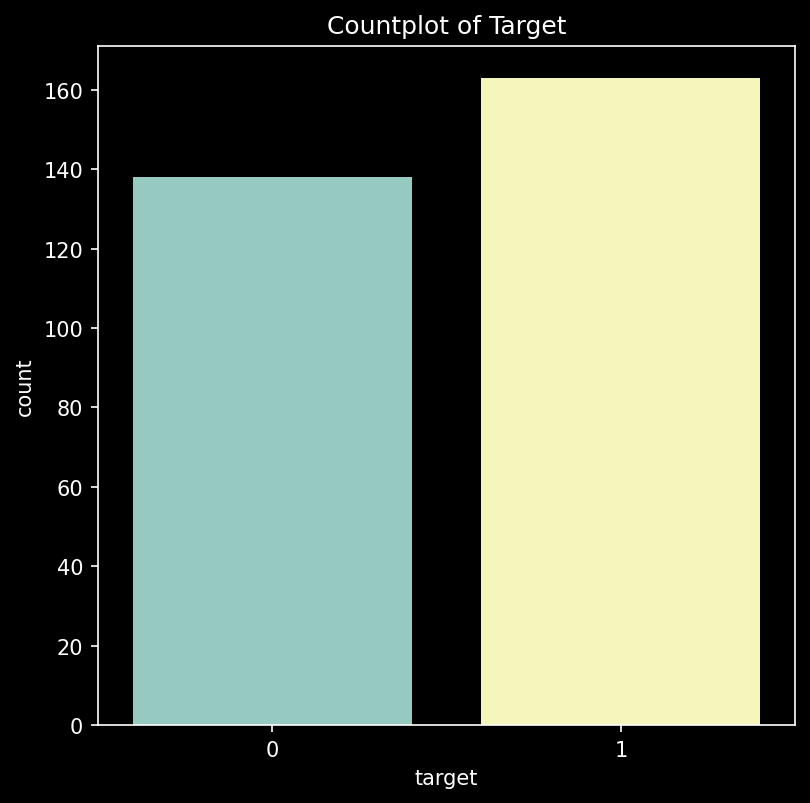

In [63]:
plt.figure(figsize=(6,6), dpi=150)
plt.style.use('dark_background')
plt.title("Countplot of Target")
sns.countplot(x='target', data=data)
plt.savefig("../media/target_countplot.png", bbox_inches='tight')

In [64]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   age  sex  cp  trestbps  chol  fbs  thalach  exang  thal
0   63    1   3       145   233    1      150      0     1
1   37    1   2       130   250    0      187      0     2
2   41    0   1       130   204    0      172      0     2
3   56    1   1       120   236    0      178      0     2
4   57    0   0       120   354    0      163      1     2


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [66]:
gridparameters_dt = {'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy']}
gridsearch_dt = GridSearchCV(DecisionTreeClassifier(), gridparameters_dt, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_dt.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_dt.best_params_)
print("\n//Best score//")
print(gridsearch_dt.best_score_)


//Best parameters//
{'criterion': 'gini', 'max_depth': 1}

//Best score//
0.7604743083003952


In [67]:
dt = DecisionTreeClassifier(**gridsearch_dt.best_params_)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [68]:
dt_con_matrix = confusion_matrix(y_test, y_pred_dt)
dt_acc = accuracy_score(y_test, y_pred_dt)
print('Confusion Matrix', '\n', dt_con_matrix, '\n')
print('Accuracy of Decision Tree Classification :', dt_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_dt))

Confusion Matrix 
 [[29  9]
 [10 28]] 

Accuracy of Decision Tree Classification : 75.0 

Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.76      0.74      0.75        38

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



In [69]:
gridparameters_rf = {'n_estimators': [100, 110, 120, 130, 140, 150], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5]}
gridsearch_rf = GridSearchCV(RandomForestClassifier(), gridparameters_rf, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_rf.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_rf.best_params_)
print("\n//Best score//")
print(gridsearch_rf.best_score_)


//Best parameters//
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 120}

//Best score//
0.8132411067193676


In [70]:
rf = RandomForestClassifier(**gridsearch_rf.best_params_)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [71]:
rf_con_matrix = confusion_matrix(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)
print('Confusion Matrix', '\n', rf_con_matrix, '\n')
print('Accuracy of Random Forest Classification :', rf_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_rf))

Confusion Matrix 
 [[30  8]
 [ 6 32]] 

Accuracy of Random Forest Classification : 81.57894736842105 

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.80      0.84      0.82        38

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [72]:
gridparameters_knn = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), gridparameters_knn, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_knn.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_knn.best_params_)
print("\n//Best score//")
print(gridsearch_knn.best_score_)


//Best parameters//
{'algorithm': 'ball_tree', 'n_neighbors': 7}

//Best score//
0.6535573122529643


In [73]:
knn = KNeighborsClassifier(**gridsearch_knn.best_params_)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [74]:
knn_con_matrix = confusion_matrix(y_test, y_pred_knn)
knn_acc = accuracy_score(y_test, y_pred_knn)
print('Confusion Matrix', '\n', knn_con_matrix, '\n')
print('Accuracy of KNN Classification :', knn_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_knn))

Confusion Matrix 
 [[25 13]
 [11 27]] 

Accuracy of KNN Classification : 68.42105263157895 

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.66      0.68        38
           1       0.68      0.71      0.69        38

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76



In [75]:
gridparameters_svc = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.1, 0.3, 0.5, 0.7, 0.9], 'probability': [True]}
gridsearch_svc = GridSearchCV(SVC(), gridparameters_svc, cv=10, scoring='accuracy', n_jobs=-1)
gridsearch_svc.fit(X_train, y_train)
print("\n//Best parameters//")
print(gridsearch_svc.best_params_)
print("\n//Best score//")
print(gridsearch_svc.best_score_)


//Best parameters//
{'C': 0.7, 'kernel': 'linear', 'probability': True}

//Best score//
0.7733201581027668


In [76]:
svc = SVC(**gridsearch_svc.best_params_)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [77]:
svc_con_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc = accuracy_score(y_test, y_pred_svc)
print('Confusion Matrix', '\n', svc_con_matrix, '\n')
print('Accuracy of SVC Classification :', svc_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_svc))

Confusion Matrix 
 [[31  7]
 [ 5 33]] 

Accuracy of SVC Classification : 84.21052631578947 

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        38
           1       0.82      0.87      0.85        38

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [78]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [79]:
nb_con_matrix = confusion_matrix(y_test, y_pred_nb)
nb_acc = accuracy_score(y_test, y_pred_nb)
print('Confusion Matrix', '\n', nb_con_matrix, '\n')
print('Accuracy of Naive Bayes Classification :', nb_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_nb))

Confusion Matrix 
 [[33  5]
 [10 28]] 

Accuracy of Naive Bayes Classification : 80.26315789473685 

Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.85      0.74      0.79        38

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [80]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [81]:
lr_con_matrix = confusion_matrix(y_test, y_pred_lr)
lr_acc = accuracy_score(y_test, y_pred_lr)
print('Confusion Matrix', '\n', lr_con_matrix, '\n')
print('Accuracy of Logistic Regression Classification :', lr_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred_lr))

Confusion Matrix 
 [[32  6]
 [ 5 33]] 

Accuracy of Logistic Regression Classification : 85.52631578947368 

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.85      0.87      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [82]:
y_score_dt = dt.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_svc = svc.predict_proba(X_test)[:, 1]
y_score_nb = nb.predict_proba(X_test)[:, 1]
y_score_lr = lr.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_lr = auc(fpr_lr, tpr_lr)

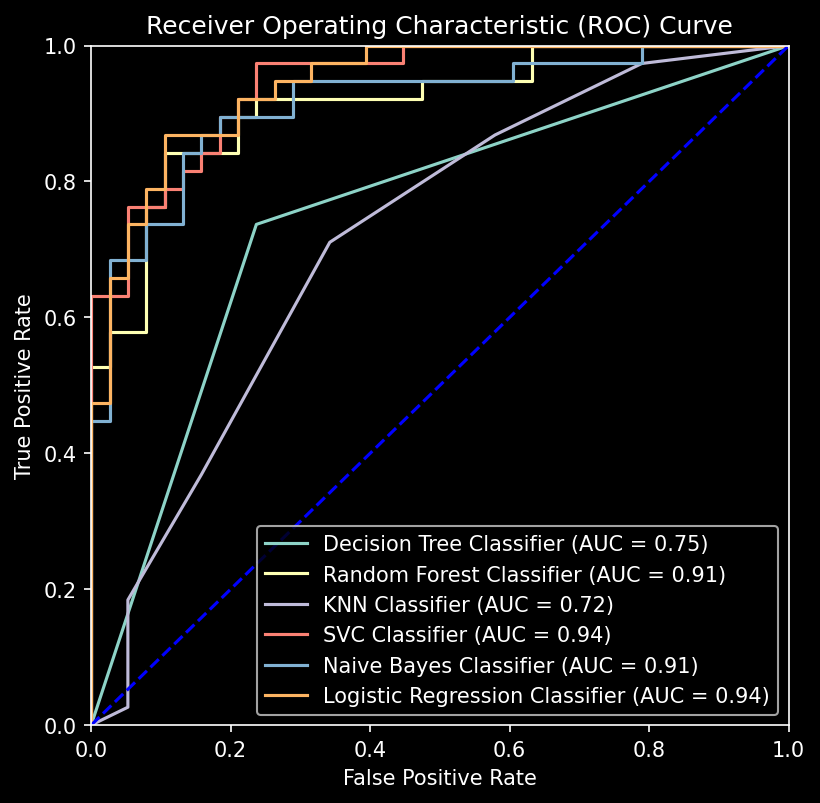

In [83]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt, estimator_name='Decision Tree Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='Random Forest Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_svc, tpr=tpr_svc, roc_auc=roc_auc_svc, estimator_name='SVC Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes Classifier').plot(ax=ax)
RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr, estimator_name='Logistic Regression Classifier').plot(ax=ax)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("../media/ROC_curve.png", bbox_inches='tight')

In [84]:
model_evaluation = pd.DataFrame(columns=['Model', 'Accuracy'])
model_evaluation['Model'] = ['Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes', 'Logistic Regression']
model_evaluation['Accuracy'] = [dt_acc, rf_acc, knn_acc, svc_acc, nb_acc, lr_acc]
model_evaluation.sort_values(by='Accuracy', ascending=False, inplace=True)
model_evaluation

,Model,Accuracy
5,Logistic Regression,0.855263
3,SVC,0.842105
1,Random Forest,0.815789
4,Naive Bayes,0.802632
0,Decision Tree,0.750000
2,KNN,0.684211


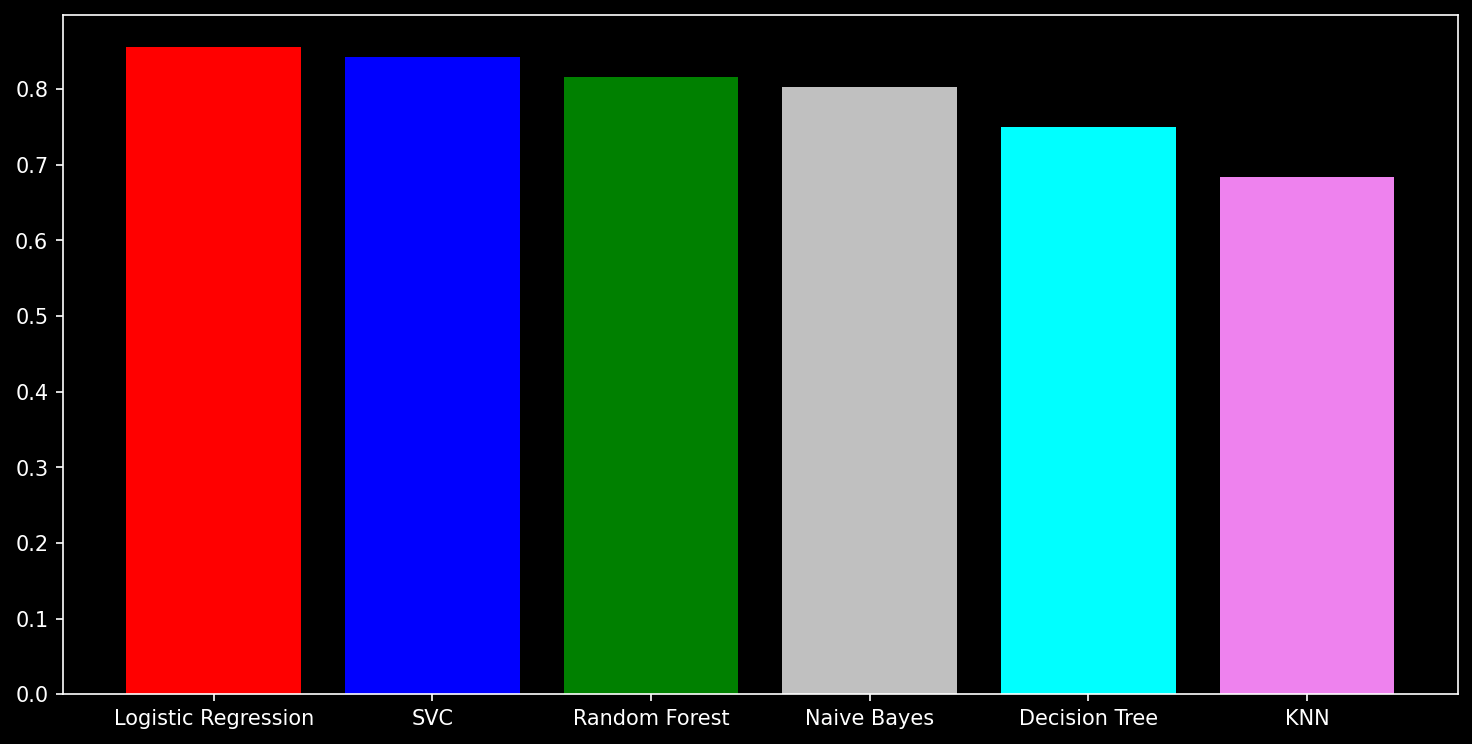

In [85]:
pal=['red','blue','green','silver','cyan','violet']
plt.figure(figsize=(12, 6), dpi=150)
plt.style.use('dark_background')
plt.bar(model_evaluation['Model'], model_evaluation['Accuracy'], color=pal)
plt.savefig("../media/accuracy_barplot.png", bbox_inches='tight')

In [86]:
dump(lr, 'lr_model.joblib')

['lr_model.joblib']